# How can we predict the value of the S&P 500?
Jasper Hsu, Thomas Suman, Trey Hensel

## Libraries and dependencies:

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
import statsmodels.api as sm
import seaborn as sns
from datetime import datetime

## Loading the data: 
https://www.kaggle.com/datasets/gkitchen/s-and-p-500-spy

In [52]:
df = pd.read_csv("spy.csv")

First, we must decide what we are trying to predict. Our dataset supplies us with four options: open, high, low, and close. Predicting the high and low values of the stock on a given day is a seemingly good idea, but this information is hard to use because it is also dependent on time - and we aren't given any data on when the stock hits either extremity. Predicting the value of the stock when the market opens is definitely useful, but it generally doesn't reflect the overall market sentiment and may be heavily influenced by unpredictable overnight news or events. On the other hand, the closing price of a stock reflects the overall market sentiment and demand for the stock at the end of the trading day. It is also widely used as a benchmark for measuring the performance of the stock market. Thus, we will be predicting the closing price.

## Test/train split:

In [70]:
train_proportion = 0.8
n = len(df)
split = math.floor(n*train_proportion)

def times_to_timestamps(time_arr):
    # Define a function to convert a single time string to a timestamp
    def time_to_timestamp(time_str):
        time_obj = datetime.strptime(time_str, '%Y-%m-%d')
        timestamp = int(time_obj.timestamp())
        return timestamp
    
    # Use the vectorize function to apply the time_to_timestamp function to every element in the array
    timestamp_arr = np.vectorize(time_to_timestamp)(time_arr)
    
    # Return the resulting array of timestamps
    return timestamp_arr

target = df["Close"]
data = pd.DataFrame(np.array([i for i in range(len(df["Date"]))]))

# the following variable records the features of examples in the training set
train_x = data.iloc[:split]
# the following variable records the features of examples in the test set
test_x = data.iloc[split+1:]
# the following variable records the labels of examples in the training set
train_y = target[:split]
# the following variable records the labels of examples in the test set
test_y = target[split+1:]

Note that we converted string data from the "Date" column formatted as "YYYY-MM-DD" to integers.

## Attempt #1: Linear Regression Model

Train MSE	 421.3492148247954
Test MSE	 25514.92334353717


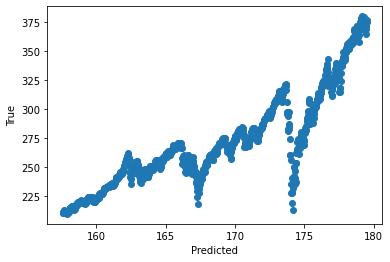

In [71]:
# This function just computes the mean squared error
def MSE(y, pred):
    return np.mean(np.square(np.subtract(y, pred)))

# This function plots the main diagonal;for a "predicted vs true" plot with perfect predictions, all data lies on this line
def plotDiagonal(xmin, xmax):
    xsamples = np.arange(xmin,xmax,step=0.01)
    plt.plot(xsamples,xsamples,c='black')

# This helper function plots x vs y and labels the axes
def plotdata(x=None,y=None,xname=None,yname=None,margin=0.05,plotDiag=True,zeromin=False):
    plt.scatter(x,y,label='data')
    plt.xlabel(xname)
    plt.ylabel(yname)
    range_x = max(x) - min(x)
    range_y = max(y) - min(y)
    if plotDiag:
        plotDiagonal(min(x)-margin*range_x,max(x)+margin*range_x)
    if zeromin:
        plt.xlim(0.0,max(x)+margin*range_x)
        plt.ylim(0.0,max(y)+margin*range_y)
    else:
        plt.xlim(min(x)-margin*range_x,max(x)+margin*range_x)
        plt.ylim(min(y)-margin*range_y,max(y)+margin*range_y)
    plt.show()

# This function plots the predicted labels vs the actual labels (We only plot the first 1000 points to avoid slow plots)
def plot_pred_true(test_pred=None, test_y=None, max_points = 1000):
    plotdata(test_pred[1:max_points], test_y[1:max_points],'Predicted', 'True', zeromin=True)

def run_OLS(train_y, test_y, train_vals, test_vals):
    ols_model = sm.regression.linear_model.OLS(train_y, train_vals)
    while True: # Bypasses SVD convergence assertion error
        try:
            results = ols_model.fit()
            break
        except:
            None
           
    w = np.array(results.params).reshape([len(results.params),1])

    train_pred = np.array(np.matmul(train_vals,w))
    test_pred = np.array(np.matmul(test_vals,w))
    
    train_MSE = MSE(train_y, train_pred.flatten())
    test_MSE = MSE(test_y, test_pred.flatten())
    
    return train_MSE, test_MSE, test_pred

train_vals_offset = np.ones(train_x.shape[0]).reshape(-1, 1)
train_vals = np.concatenate([train_x, train_vals_offset], axis=1)

test_vals_offset = np.ones(test_x.shape[0]).reshape(-1, 1)
test_vals = np.concatenate([test_x, test_vals_offset], axis=1)

train_MSE, test_MSE, test_pred = run_OLS(train_y, test_y, train_vals, test_vals)

print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y)

<class 'str'>
[90.63612301 90.63612301 90.63612301 ... 90.63612301 90.63612301
 90.63612301]


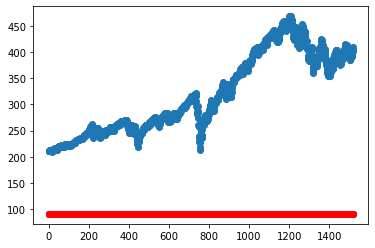

In [60]:
d = pd.read_csv("spy.csv")

dt = d["Date"]
print(type(dt[0]))

d = d["Close"]
d = d.iloc[split+1:]

plt.scatter([i for i in range(len(d))], d)
plt.scatter([i for i in range(len(test_pred.flatten()))], test_pred.flatten(), color="r")

print(test_pred.flatten())

In [63]:
X = data
y = target
print(X)
print(y)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[7598 rows x 0 columns]
0        25.122355
1        25.301018
2        25.354630
3        25.622644
4        25.729862
           ...    
7593    396.489990
7594    395.600006
7595    401.350006
7596    403.700012
7597    409.390015
Name: Close, Length: 7598, dtype: float64
